In [1]:
import pandas as pd
df_train_flight=pd.read_excel("Flight_Train_set.xlsx",parse_dates=["Date_of_Journey","Dep_Time","Arrival_Time"])
df_test_flight=pd.read_excel("Flight_Test_set.xlsx",parse_dates=["Date_of_Journey","Dep_Time","Arrival_Time"])
df_train_flight["dataset"]="train"
df_test_flight["dataset"]="test"
#Merging the datasets
df_flight=pd.concat([df_train_flight,df_test_flight],ignore_index=True)
df_flight

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,dataset
0,No info,IndiGo,2020-03-22 01:10:00,2019-03-24,2020-05-29 22:20:00,New Delhi,2h 50m,3897.0,BLR → DEL,Banglore,non-stop,train
1,No info,Air India,2020-05-29 13:15:00,2019-01-05,2020-05-29 05:50:00,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops,train
2,No info,Jet Airways,2020-06-10 04:25:00,2019-09-06,2020-05-29 09:25:00,Cochin,19h,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops,train
3,No info,IndiGo,2020-05-29 23:30:00,2019-12-05,2020-05-29 18:05:00,Banglore,5h 25m,6218.0,CCU → NAG → BLR,Kolkata,1 stop,train
4,No info,IndiGo,2020-05-29 21:35:00,2019-01-03,2020-05-29 16:50:00,New Delhi,4h 45m,13302.0,BLR → NAG → DEL,Banglore,1 stop,train
...,...,...,...,...,...,...,...,...,...,...,...,...
13349,No info,Air India,2020-06-07 20:25:00,2019-06-06,2020-05-29 20:30:00,Banglore,23h 55m,NaN,CCU → DEL → BLR,Kolkata,1 stop,test
13350,No info,IndiGo,2020-05-29 16:55:00,2019-03-27,2020-05-29 14:20:00,Banglore,2h 35m,NaN,CCU → BLR,Kolkata,non-stop,test
13351,No info,Jet Airways,2020-03-07 04:25:00,2019-06-03,2020-05-29 21:50:00,Cochin,6h 35m,NaN,DEL → BOM → COK,Delhi,1 stop,test
13352,No info,Air India,2020-05-29 19:15:00,2019-06-03,2020-05-29 04:00:00,Cochin,15h 15m,NaN,DEL → BOM → COK,Delhi,1 stop,test


In [2]:
#Lets chcek the null values in the dataset
df_flight.isnull().sum()
#There are no null values only Price has 2671 null values which are part of test dataset so no need to worry

Additional_Info       0
Airline               0
Arrival_Time          0
Date_of_Journey       0
Dep_Time              0
Destination           0
Duration              0
Price              2671
Route                 1
Source                0
Total_Stops           1
dataset               0
dtype: int64

In [3]:
#Lets chcek the datatypes of the columns
df_flight.dtypes
#Below "Duration" is of object datatype which we will convert into hours as float dataype

Additional_Info            object
Airline                    object
Arrival_Time       datetime64[ns]
Date_of_Journey    datetime64[ns]
Dep_Time           datetime64[ns]
Destination                object
Duration                   object
Price                     float64
Route                      object
Source                     object
Total_Stops                object
dataset                    object
dtype: object

In [4]:
x=(df_flight["Arrival_Time"]-df_flight["Dep_Time"])
duration_list=list()
for i in range(len(x)):
    dur=x.iloc[i].seconds/3600
    duration_list.append(dur)
df_flight["Duration"]=duration_list
df_flight

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,dataset
0,No info,IndiGo,2020-03-22 01:10:00,2019-03-24,2020-05-29 22:20:00,New Delhi,2.833333,3897.0,BLR → DEL,Banglore,non-stop,train
1,No info,Air India,2020-05-29 13:15:00,2019-01-05,2020-05-29 05:50:00,Banglore,7.416667,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops,train
2,No info,Jet Airways,2020-06-10 04:25:00,2019-09-06,2020-05-29 09:25:00,Cochin,19.000000,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops,train
3,No info,IndiGo,2020-05-29 23:30:00,2019-12-05,2020-05-29 18:05:00,Banglore,5.416667,6218.0,CCU → NAG → BLR,Kolkata,1 stop,train
4,No info,IndiGo,2020-05-29 21:35:00,2019-01-03,2020-05-29 16:50:00,New Delhi,4.750000,13302.0,BLR → NAG → DEL,Banglore,1 stop,train
...,...,...,...,...,...,...,...,...,...,...,...,...
13349,No info,Air India,2020-06-07 20:25:00,2019-06-06,2020-05-29 20:30:00,Banglore,23.916667,NaN,CCU → DEL → BLR,Kolkata,1 stop,test
13350,No info,IndiGo,2020-05-29 16:55:00,2019-03-27,2020-05-29 14:20:00,Banglore,2.583333,NaN,CCU → BLR,Kolkata,non-stop,test
13351,No info,Jet Airways,2020-03-07 04:25:00,2019-06-03,2020-05-29 21:50:00,Cochin,6.583333,NaN,DEL → BOM → COK,Delhi,1 stop,test
13352,No info,Air India,2020-05-29 19:15:00,2019-06-03,2020-05-29 04:00:00,Cochin,15.250000,NaN,DEL → BOM → COK,Delhi,1 stop,test


In [5]:
#Lets again chcek the datatype
df_flight.dtypes
#Since we have Date of journey,dep_time and duration we can drop "Arrival_Time"  right away

Additional_Info            object
Airline                    object
Arrival_Time       datetime64[ns]
Date_of_Journey    datetime64[ns]
Dep_Time           datetime64[ns]
Destination                object
Duration                  float64
Price                     float64
Route                      object
Source                     object
Total_Stops                object
dataset                    object
dtype: object

In [6]:
df_flight.drop(columns=["Arrival_Time"],inplace=True)

In [7]:
#Lets chcek the value counts of each column of object datatype
for col in df_flight.columns:
    if df_flight[col].dtype=="object":
        print(df_flight[col].value_counts())
        print()

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
2 Long layover                      1
1 Short layover                     1
Red-eye flight                      1
Name: Additional_Info, dtype: int64

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

Cochin       5682
Banglore     3581
Delhi        1

In [8]:
df_flight.dtypes

Additional_Info            object
Airline                    object
Date_of_Journey    datetime64[ns]
Dep_Time           datetime64[ns]
Destination                object
Duration                  float64
Price                     float64
Route                      object
Source                     object
Total_Stops                object
dataset                    object
dtype: object

In [9]:
#By chceking value counts we can conclude "1 Long layover" and "2 Long layover" as "Long layover"
#"No info" and "No Info" are one and same thing and repaced by "No Info"
#For airlines we can combine the last few to their main tag as they are vey less in counts
df_flight["Additional_Info"].replace("1 Long layover","Long layover",inplace=True)
df_flight["Additional_Info"].replace("2 Long layover","Long layover",inplace=True)
df_flight["Additional_Info"].replace("No info","No Info",inplace=True)
df_flight["Airline"].replace("Jet Airways Business","Jet Airways",inplace=True)
df_flight["Airline"].replace("Multiple carriers Premium economy","Multiple carriers",inplace=True)
df_flight["Airline"].replace("Vistara Premium economy","Vistara",inplace=True)

In [10]:
#In Destination column "New Delhi" can be replaced by "Delhi"
df_flight["Destination"].replace("New Delhi","Delhi",inplace=True)

In [11]:
#Lets again chcek the value counts
for col in df_flight.columns:
    if df_flight[col].dtype=="object":
        print(df_flight[col].value_counts())
        print()

No Info                         10496
In-flight meal not included      2426
No check-in baggage included      396
Long layover                       21
Change airports                     8
Business class                      5
1 Short layover                     1
Red-eye flight                      1
Name: Additional_Info, dtype: int64

Jet Airways          4754
IndiGo               2564
Air India            2192
Multiple carriers    1559
SpiceJet             1026
Vistara               613
Air Asia              405
GoAir                 240
Trujet                  1
Name: Airline, dtype: int64

Cochin       5682
Banglore     3581
Delhi        2752
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

DEL → BOM → COK                3000
BLR → DEL                      1941
CCU → BOM → BLR                1232
CCU → BLR                       896
BOM → HYD                       785
                               ... 
BOM → BLR → CCU → BBI → HYD       1
CCU → VTZ → BLR      

In [12]:
#need to exract features from dep_time
import numpy as np
df_flight["time_of_day"]=np.where((df_flight["Dep_Time"].dt.hour>=0)&(df_flight["Dep_Time"].dt.hour<=2),"Late Night",np.where((df_flight["Dep_Time"].dt.hour>=3)&(df_flight["Dep_Time"].dt.hour<=7),"Early Morning",np.where((df_flight["Dep_Time"].dt.hour>=8)&(df_flight["Dep_Time"].dt.hour<=11),"Morning",np.where((df_flight["Dep_Time"].dt.hour>=12)&(df_flight["Dep_Time"].dt.hour<=16),"Afternoon",np.where((df_flight["Dep_Time"].dt.hour>=17)&(df_flight["Dep_Time"].dt.hour<=19),"Evening","Night")))))
df_flight

,Additional_Info,Airline,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,dataset,time_of_day
0,No Info,IndiGo,2019-03-24,2020-05-29 22:20:00,Delhi,2.833333,3897.0,BLR → DEL,Banglore,non-stop,train,Night
1,No Info,Air India,2019-01-05,2020-05-29 05:50:00,Banglore,7.416667,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops,train,Early Morning
2,No Info,Jet Airways,2019-09-06,2020-05-29 09:25:00,Cochin,19.000000,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops,train,Morning
3,No Info,IndiGo,2019-12-05,2020-05-29 18:05:00,Banglore,5.416667,6218.0,CCU → NAG → BLR,Kolkata,1 stop,train,Evening
4,No Info,IndiGo,2019-01-03,2020-05-29 16:50:00,Delhi,4.750000,13302.0,BLR → NAG → DEL,Banglore,1 stop,train,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...
13349,No Info,Air India,2019-06-06,2020-05-29 20:30:00,Banglore,23.916667,NaN,CCU → DEL → BLR,Kolkata,1 stop,test,Night
13350,No Info,IndiGo,2019-03-27,2020-05-29 14:20:00,Banglore,2.583333,NaN,CCU → BLR,Kolkata,non-stop,test,Afternoon
13351,No Info,Jet Airways,2019-06-03,2020-05-29 21:50:00,Cochin,6.583333,NaN,DEL → BOM → COK,Delhi,1 stop,test,Night
13352,No Info,Air India,2019-06-03,2020-05-29 04:00:00,Cochin,15.250000,NaN,DEL → BOM → COK,Delhi,1 stop,test,Early Morning


In [13]:
#Some of the columns we can drop like "Date_of_Journey","Route"
df_flight.drop(columns=["Date_of_Journey","Route"],inplace=True)

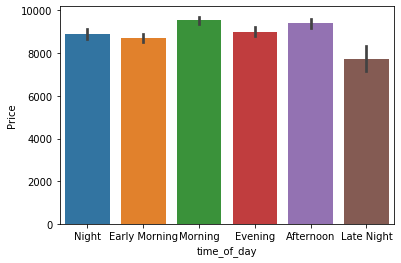

In [14]:
#Lets chcek when the averge price of the flights during entire day
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x="time_of_day",y="Price",data=df_flight)
plt.show()

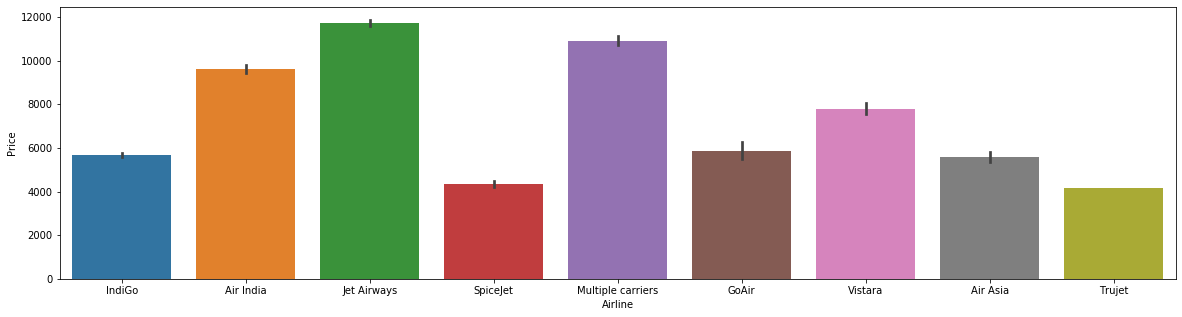

In [15]:
#lets check which airline is expensive based on average price
plt.figure(figsize=(20,5))
sns.barplot(x="Airline",y="Price",data=df_flight)
plt.show()

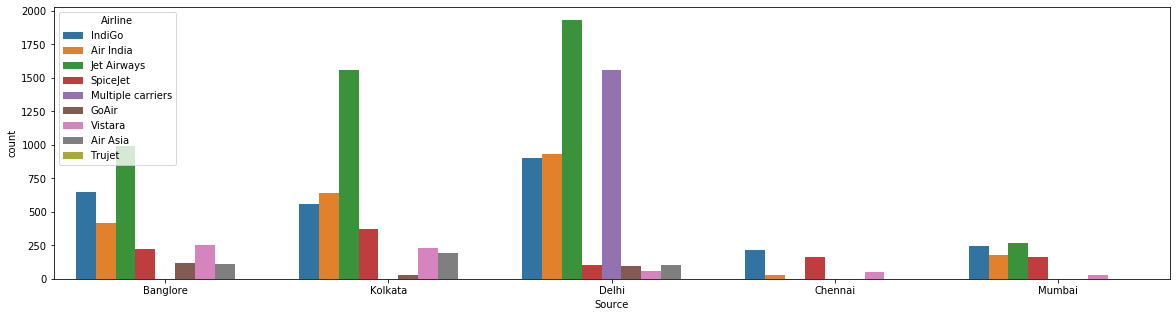

In [16]:
#Lets chcek the most popular flight region wise
plt.figure(figsize=(20,5))
sns.countplot(x="Source",hue="Airline",data=df_flight)
plt.show()

In [17]:
#this is the mean of whole df_flight which includes train and test
df_flight.loc[df_flight["Airline"]=="IndiGo",["Price"]].mean()

Price    5673.682903
dtype: float64

In [18]:
#this is the mean of only train part of df_flight
df_flight.loc[(df_flight["Airline"]=="IndiGo")&(df_flight["dataset"]=="train"),["Price"]].mean()

Price    5673.682903
dtype: float64

In [19]:
#the above two means are  equal because  and that means it does not considers observation where price null

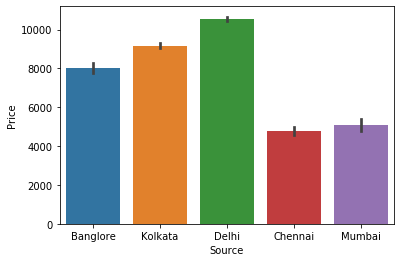

In [20]:
#Lets chcek from which region averge price of the flight was more
sns.barplot(x="Source",y="Price",data=df_flight)
plt.show()

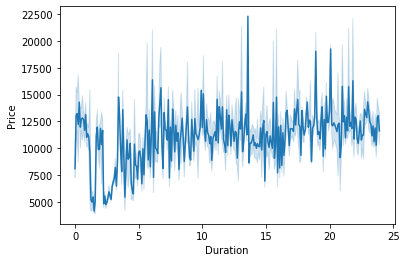

In [21]:
#lets draw a line plot between duration and price
sns.lineplot(x="Duration",y="Price",data=df_flight)
plt.show()
#this picture does not give clear idea about the correlation

In [22]:
#lets chcek the correlation matrix
df_flight.corr()
#so there positive correlation of 0.45 between price and duration

,Duration,Price
Duration,1.000000,0.450205
Price,0.450205,1.000000


In [23]:
#lets delete the Dep_Time column from the dataset
df_flight.drop(columns=["Dep_Time"],inplace=True)
df_flight.dtypes

Additional_Info     object
Airline             object
Destination         object
Duration           float64
Price              float64
Source              object
Total_Stops         object
dataset             object
time_of_day         object
dtype: object

In [24]:
#lets use one hot encodig to covert object datatypes to integers
df_flight_final=pd.get_dummies(df_flight,columns=["Additional_Info","Airline","Destination","Source","Total_Stops","time_of_day"],drop_first=True)
df_flight_final

,Duration,Price,dataset,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_Long layover,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight,...,Source_Mumbai,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,time_of_day_Early Morning,time_of_day_Evening,time_of_day_Late Night,time_of_day_Morning,time_of_day_Night
0,2.833333,3897.0,train,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,7.416667,7662.0,train,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
2,19.000000,13882.0,train,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,5.416667,6218.0,train,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,4.750000,13302.0,train,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,23.916667,NaN,test,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
13350,2.583333,NaN,test,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
13351,6.583333,NaN,test,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
13352,15.250000,NaN,test,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [25]:
#Lets seprate the train and test from df_flight_final
df_train=df_flight_final.loc[df_flight_final["dataset"]=="train"]
df_test=df_flight_final.loc[df_flight_final["dataset"]=="test"]

In [26]:
#re indexing the test dataset
df_test.reset_index(drop=True,inplace=True)

In [27]:
#Lets drop "Price" and "dataset" columns from the test dataset
#Also droping "dataset" columns from the train dataset
df_test.drop(columns=["Price","dataset"],inplace=True)
df_train.drop(columns=["dataset"],inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [28]:
#lets divide the df_train into iput an doutput
df_x=df_train.drop(columns=["Price"])
y=df_train[["Price"]]

In [29]:
#Lets bring every column to common scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)

In [30]:
#Lets use PCA for dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=29)
x_pca=pca.fit_transform(x)
print("vraiance :{}".format(np.sum(pca.explained_variance_ratio_)))

vraiance :1.0


In [31]:
#to find random stat which gives maximum r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,df_x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state


In [32]:
#lets make a function which evaluates the model using cross_val_score
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    c_scores=cross_val_score(model,x,y,cv=5,scoring="r2")
    print("Mean r2 score for regressor: ",c_scores.mean())
    print("standard deviation in r2 score for regressor: ",c_scores.std())
    print(c_scores)

In [33]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
r_state=maxr2_score(dtr,x_pca,y)

r2 score corresponding to  42  is  0.6345569491702838
r2 score corresponding to  43  is  0.6624341346109095
r2 score corresponding to  44  is  0.6722787449216528
r2 score corresponding to  45  is  0.6561044649091258
r2 score corresponding to  46  is  0.6496446759904839
r2 score corresponding to  47  is  0.68188168113517
r2 score corresponding to  48  is  0.7058529726441383
r2 score corresponding to  49  is  0.6599454033139183
r2 score corresponding to  50  is  0.6491405829930487
r2 score corresponding to  51  is  0.7037290911158809
r2 score corresponding to  52  is  0.6500777012397644
r2 score corresponding to  53  is  0.5847705791292834
r2 score corresponding to  54  is  0.5495528930269843
r2 score corresponding to  55  is  0.5981229358238964
r2 score corresponding to  56  is  0.6234572615655938
r2 score corresponding to  57  is  0.6314657847288612
r2 score corresponding to  58  is  0.6115538415901635
r2 score corresponding to  59  is  0.6527973829412154
r2 score corresponding to  60 

In [34]:
#Lets chcek the cross_val_score for decision trees
print("Decision Tree Regressor\n\n")
model_evaluation(dtr,x_pca,y)

Decision Tree Regressor


Mean r2 score for regressor:  0.6629596790333687
standard deviation in r2 score for regressor:  0.014754279245050158
[0.65680605 0.63916764 0.66234033 0.67532486 0.68115952]


In [35]:
#Lets chcek random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
rfr=RandomForestRegressor()
parameters = {"n_estimators":[10,100,500]}
clf = GridSearchCV(rfr, parameters, cv=5,scoring="r2")
clf.fit(x_pca,y)
clf.best_params_

{'n_estimators': 500}

In [36]:
#lets chcek Random forest using n_estimators=500 
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=500)
#Lets chcek the cross_val_score for Random Forest Regressor
print("Random Forest Regressor\n\n")
model_evaluation(rfr,x_pca,y)

Random Forest Regressor


Mean r2 score for regressor:  0.7123603173543271
standard deviation in r2 score for regressor:  0.01153454822984617
[0.69664004 0.70257336 0.71411019 0.719935   0.728543  ]


In [37]:
#Lets chcek KNN regressor
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
parameters = {"n_neighbors":range(2,30)}
clf = GridSearchCV(knr, parameters, cv=5,scoring="r2")
clf.fit(x_pca, y)
clf.best_params_

{'n_neighbors': 5}

In [38]:
knr=KNeighborsRegressor(n_neighbors=5)
maxr2_score(knr,x_pca,y)

r2 score corresponding to  42  is  0.7120315055967761
r2 score corresponding to  43  is  0.6992955531208481
r2 score corresponding to  44  is  0.7267600046083006
r2 score corresponding to  45  is  0.6951874532373497
r2 score corresponding to  46  is  0.7056654543913894
r2 score corresponding to  47  is  0.7198405961058763
r2 score corresponding to  48  is  0.6873332430804929
r2 score corresponding to  49  is  0.6879734452934461
r2 score corresponding to  50  is  0.698511251302051
r2 score corresponding to  51  is  0.7330173819723818
r2 score corresponding to  52  is  0.7292128462795828
r2 score corresponding to  53  is  0.6504574416644513
r2 score corresponding to  54  is  0.7036873381548088
r2 score corresponding to  55  is  0.6746470116988295
r2 score corresponding to  56  is  0.6677848644518377
r2 score corresponding to  57  is  0.6866525793478528
r2 score corresponding to  58  is  0.7067772311434682
r2 score corresponding to  59  is  0.6976381441596875
r2 score corresponding to  60

77

In [39]:
#Lets check the cross_val score of KKN regressor
print("KNN Regressor\n\n")
model_evaluation(knr,x_pca,y)

KNN Regressor


Mean r2 score for regressor:  0.7113636866291516
standard deviation in r2 score for regressor:  0.011100202782345107
[0.69276562 0.71641215 0.71007149 0.72693591 0.71063326]


In [40]:
#lets chcek the SVM
from sklearn.svm import SVR
svr=SVR()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svr, parameters, cv=5,scoring="r2")
clf.fit(x_pca,y)
clf.best_params_

{'C': 10, 'kernel': 'linear'}

In [41]:
svr=SVR(C=10,kernel="linear")
maxr2_score(svr,x_pca,y)

r2 score corresponding to  42  is  0.6014777522625447
r2 score corresponding to  43  is  0.6249850246337748
r2 score corresponding to  44  is  0.6171572826999684
r2 score corresponding to  45  is  0.5814434677380566
r2 score corresponding to  46  is  0.610448963172602
r2 score corresponding to  47  is  0.5958986138176052
r2 score corresponding to  48  is  0.5837120968220139
r2 score corresponding to  49  is  0.6154336756496488
r2 score corresponding to  50  is  0.5890415832628999
r2 score corresponding to  51  is  0.6387123763870611
r2 score corresponding to  52  is  0.5963139280738686
r2 score corresponding to  53  is  0.6177152412731066
r2 score corresponding to  54  is  0.611049592698582
r2 score corresponding to  55  is  0.5514515698665119
r2 score corresponding to  56  is  0.576920801878434
r2 score corresponding to  57  is  0.6098311255012474
r2 score corresponding to  58  is  0.6497953622830321
r2 score corresponding to  59  is  0.5904430020068474
r2 score corresponding to  60  

75

In [42]:
#random forest and KNN are peforming almost equally good,but KNN is faster so we will choose KNN as our Final model
#knr is model
x_train, x_test, y_train, y_test = train_test_split(x_pca, y,random_state = 77,test_size=0.20)
knr.fit(x_train,y_train)
y_pred=knr.predict(x_test)

In [43]:
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  2189.838216693751
r2_score is:  0.7500528105659395


In [44]:
#lets transform df_test accoring to pca
x_pca_test=pca.transform(df_test)
price_pred=knr.predict(x_pca_test)

In [45]:
#lets make the dataframe for price_pred
price_pred=pd.DataFrame(price_pred,columns=["Price"])

In [46]:
#Lets save the submission to csv
price_pred.to_csv("Flight_Price_Predictions.csv",index=False)